# ВІЗУАЛІЗАЦІЯ ДАНИХ

### ТЕОРЕТИЧНА ЧАСТИНА ТА ПРИКЛАДИ

[EDA](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - розвідувательний (дослідницький) аналіз даних - це технологія, яка межує з технологіями __Data Mining__ та __Data Science__.

Інструментальні засоби EDA призначені для швидкого та наглядного відображення статистичних властивостей даних, що отримані на попередніх етапах Data Mining.

Існують високорівневі засоби EDA:
- [IDE RStudio](https://www.r-studio.com/ru/), 
- [RapidMiner](https://rapidminer.com/get-started/),
- [MATLAB](https://www.mathworks.com/products/matlab.html) та ін.;

Python-бібліотеки з відкритим кодом:
- [SeaBorn](https://seaborn.pydata.org)
- [Sweetviz](https://pypi.org/project/sweetviz/)
- [Pandas-profiling](https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/) 
та деякі менш розповсюджені


В основі більшості з вищезгаданих технологій лежіть бібліотека візуалізації даних [Matplotlib](https://ru.wikipedia.org/wiki/Matplotlib) яка тісно пов'язана з датасетами _Pandas_ та масивами _NumPy_

[__Matplotlib__](https://matplotlib.org) - це низькорівнева графічна бібліотека для python з [відкритим кодом](https://github.com/matplotlib/matplotlib) написана на python, частково на _C_, _objective-C_ та _javascript_.

In [3]:
# перевіримо наявність бібліотеки matplotlib
!pip list
!pip show matplotlib

Package                  Version
------------------------ -----------
aiohttp                  3.7.4.post0
appdirs                  1.4.4
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
async-generator          1.10
async-timeout            3.0.1
attrs                    21.4.0
backcall                 0.2.0
beautifulsoup4           4.11.1
bleach                   5.0.0
bs4                      0.0.1
cachetools               5.2.0
certifi                  2022.5.18.1
cffi                     1.15.0
chardet                  4.0.0
charset-normalizer       2.0.12
click                    8.1.3
colorama                 0.4.4
cssselect                1.1.0
cycler                   0.11.0
DateTime                 5.0
debugpy                  1.6.0
decorator                5.1.1
decouple                 0.0.7
defusedxml               0.7.1
discord                  1.7.3
discord.py               1.7.3
docutils                 0.19
emoji                    1.7.0
entrypoints     


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Name: matplotlib
Version: 3.5.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\users\alexa\appdata\local\programs\python\python37\lib\site-packages
Requires: cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: wordcloud


In [ ]:
# якщо її немає на комп'ютері, то встановимо
#!pip install matplotlib

In [4]:
# підключення бібліотеки 
import matplotlib

In [5]:
# основним об'єктом в `matplotlib` є `plot` що розташований в модулі `pyplot`
from matplotlib import pyplot as plt

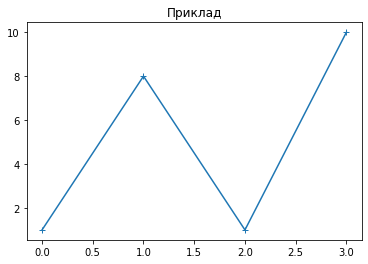

In [6]:
import numpy as np
ypoints = np.array([1, 8, 1, 10])

plt.plot(ypoints, marker = '+')
plt.title("Приклад")
plt.show()

### ПРИКЛАД ПОШУКУ АНОМАЛІЙ ТА ВІДНОВЛЕННЯ ДАНИХ

Оцінити та поліпшити якість даних про продаж нерухомості, які накопичені в файлі `aprt_properties.csv`


Приведення даних до якості наобхідної для подальшого використання в моделях ML складається з декількох етапів:
1. _Оцінка структури_ - визначення показчиків, які мають сенс в данному контексті та вилучення тих, що не є необхідними.
2. _Приведення типів_ показчиків до придатності проведення чисельного аналізу та моделювання
3. _Відновлення пропущених даних (missing data recovery)_ - застосування методів, які дозволяють відновити дані в яких відсутні значення (NaN, None, Null, '', ...)
4. _Виявленя аномалій (outliers detection)_ - показчиків, значення яких не є допустимим в контексті аналізу.

In [9]:
pd.set_option?

In [8]:
import pandas as pd
import numpy as np

pd.set_option("display.float_format", '{:.1f}'.format)

In [11]:
# створюємо датафрейм та завантажуємо в нього csv-файл 
aprt = pd.read_csv('apartments.csv', 
                    names=['ціна', 
                           'кімнат', 
                           'ціна за метр',
                           'поверх',
                           'всього поверхів',
                           'рік збудови',
                           'площа',
                           'житлова площа',
                           'кухня',
                           'вулиця',
                           'дата пропозиції'],
                   index_col = False,
                  )

#### загальна інформація проо дані

In [12]:
# вивести 5 перших рядків датасету
aprt.head(5)

,ціна,кімнат,ціна за метр,поверх,всього поверхів,рік збудови,площа,житлова площа,кухня,вулиця,дата пропозиції
0,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street,publish_date
1,140000.0,2,2258.0,7,9,1969,62.0,47.0,9.0,Омеляновича-Павленка,3 вересня 2020 р.
2,105000.0,4,847.0,25,26,2018,124.0,71.0,16.0,NaN,7 жовтня 2020 р.
3,175000.0,3,1786.0,25,26,2010,98.0,None,None,Ованеса Туманяна,1 жовтня 2020 р.
4,30970.0,1,1106.0,12,13,2013,28.0,13.0,5.0,Петропавлівська,1 лютого


In [13]:
# оцінка типів показчиків
aprt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ціна             729 non-null    object
 1   кімнат           729 non-null    object
 2   ціна за метр     729 non-null    object
 3   поверх           729 non-null    object
 4   всього поверхів  729 non-null    object
 5   рік збудови      729 non-null    object
 6   площа            729 non-null    object
 7   житлова площа    729 non-null    object
 8   кухня            729 non-null    object
 9   вулиця           716 non-null    object
 10  дата пропозиції  729 non-null    object
dtypes: object(11)
memory usage: 62.8+ KB


In [14]:
# перелік колонок датасета
aprt.columns

Index(['ціна', 'кімнат', 'ціна за метр', 'поверх', 'всього поверхів',
       'рік збудови', 'площа', 'житлова площа', 'кухня', 'вулиця',
       'дата пропозиції'],
      dtype='object')

In [15]:
# вилучення непотрібних колонок
aprt.drop(columns=['вулиця','дата пропозиції'], inplace=True)

In [16]:
aprt.head(3)

,ціна,кімнат,ціна за метр,поверх,всього поверхів,рік збудови,площа,житлова площа,кухня
0,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen
1,140000.0,2,2258.0,7,9,1969,62.0,47.0,9.0
2,105000.0,4,847.0,25,26,2018,124.0,71.0,16.0


#### перетворення типів показчиків

In [17]:
aprt.columns

Index(['ціна', 'кімнат', 'ціна за метр', 'поверх', 'всього поверхів',
       'рік збудови', 'площа', 'житлова площа', 'кухня'],
      dtype='object')

In [18]:
pd.to_numeric?

In [19]:
for prop in aprt.columns:
    aprt[prop] = pd.to_numeric(aprt[prop], errors='coerce')

In [20]:
aprt.head(3)

,ціна,кімнат,ціна за метр,поверх,всього поверхів,рік збудови,площа,житлова площа,кухня
0,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,140000.0,2.0,2258.0,7.0,9.0,1969.0,62.0,47.0,9.0
2,105000.0,4.0,847.0,25.0,26.0,2018.0,124.0,71.0,16.0


In [21]:
aprt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ціна             728 non-null    float64
 1   кімнат           724 non-null    float64
 2   ціна за метр     723 non-null    float64
 3   поверх           703 non-null    float64
 4   всього поверхів  703 non-null    float64
 5   рік збудови      540 non-null    float64
 6   площа            640 non-null    float64
 7   житлова площа    497 non-null    float64
 8   кухня            524 non-null    float64
dtypes: float64(9)
memory usage: 51.4 KB


In [22]:
aprt.describe()

,ціна,кімнат,ціна за метр,поверх,всього поверхів,рік збудови,площа,житлова площа,кухня
count,728.0,724.0,723.0,703.0,703.0,540.0,640.0,497.0,524.0
mean,200138.4,2.2,2090.3,9.6,17.7,1996.7,79.9,42.3,15.9
std,674893.9,1.0,5900.9,6.9,8.5,27.1,51.1,30.6,10.0
min,10092.1,1.0,478.0,1.0,2.0,1860.0,15.0,10.0,3.0
25%,65000.0,1.0,1147.0,4.0,9.0,1977.0,50.0,25.0,10.0
50%,103950.0,2.0,1562.0,8.0,19.0,2010.0,68.5,37.0,14.0
75%,170000.0,3.0,2188.0,14.0,25.0,2016.0,92.2,50.0,18.0
max,15700000.0,7.0,157000.0,33.0,47.0,2021.0,520.0,320.0,78.0


#### відновлення пропущених даних

__Методи, що використовуються для відновлення даних:__
1. Вилучення пропущених даних
2. Заповнення пропущених даних обрахованим статистичним показчиком або константою
3. [Інтерполяція пропущених даних](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/)
4. Використання моделей ML та DL для прогнозування пропущених даних

In [23]:
# статистика пропущених даних
# в табличній формі
aprt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ціна             728 non-null    float64
 1   кімнат           724 non-null    float64
 2   ціна за метр     723 non-null    float64
 3   поверх           703 non-null    float64
 4   всього поверхів  703 non-null    float64
 5   рік збудови      540 non-null    float64
 6   площа            640 non-null    float64
 7   житлова площа    497 non-null    float64
 8   кухня            524 non-null    float64
dtypes: float64(9)
memory usage: 51.4 KB


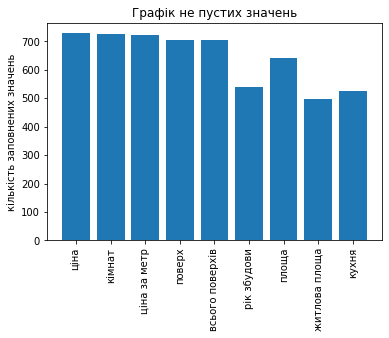

In [24]:
# або в графічній формі
plt.bar(aprt.columns, aprt.count())
plt.ylabel("кількість заповнених значень")
plt.xticks(rotation='vertical')
plt.title('Графік не пустих значень')
plt.show()

In [25]:
missing_data_mask = aprt.isna()

In [26]:
missing_data_mask.head(5)

,ціна,кімнат,ціна за метр,поверх,всього поверхів,рік збудови,площа,житлова площа,кухня
0,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False


In [27]:
# частка пропущених даних
missing_fruction = missing_data_mask.sum(axis=1)/len(aprt.columns)

In [28]:
len(missing_fruction)

729

In [30]:
missing_fruction.head(10)

0   1.0
1   0.0
2   0.0
3   0.2
4   0.0
5   0.3
6   0.0
7   0.2
8   0.0
9   0.0
dtype: float64

In [31]:
# вилученя рядків що містять 5 або більше відсутніх показчиків
aprt.dropna(thresh=5, inplace=True)

In [32]:
aprt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 1 to 728
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ціна             706 non-null    float64
 1   кімнат           704 non-null    float64
 2   ціна за метр     705 non-null    float64
 3   поверх           703 non-null    float64
 4   всього поверхів  703 non-null    float64
 5   рік збудови      539 non-null    float64
 6   площа            623 non-null    float64
 7   житлова площа    497 non-null    float64
 8   кухня            524 non-null    float64
dtypes: float64(9)
memory usage: 55.2 KB


In [33]:
aprt.mean(axis=0)

ціна              195986.3
кімнат                 2.2
ціна за метр        2066.1
поверх                 9.6
всього поверхів       17.7
рік збудови         1996.7
площа                 79.6
житлова площа         42.3
кухня                 15.9
dtype: float64

In [34]:
aprt.median(axis=0)

ціна              101250.0
кімнат                 2.0
ціна за метр        1550.0
поверх                 8.0
всього поверхів       19.0
рік збудови         2010.0
площа                 69.0
житлова площа         37.0
кухня                 14.0
dtype: float64

In [35]:
# вибір заповнювача - побудуємо допоміжний датафрейм
pd.DataFrame(data={"Mean"      : aprt.mean(axis=0),
                   "Median"    : aprt.median(axis=0),
                   "Std"       : aprt.std(axis=0),
                   "Mean - Std": aprt.mean(axis=0) - aprt.std(axis=0)} )

,Mean,Median,Std,Mean - Std
ціна,195986.3,101250.0,681978.0,-485991.7
кімнат,2.2,2.0,1.0,1.2
ціна за метр,2066.1,1550.0,5968.9,-3902.8
поверх,9.6,8.0,6.9,2.7
всього поверхів,17.7,19.0,8.5,9.2
рік збудови,1996.7,2010.0,27.2,1969.5
площа,79.6,69.0,50.5,29.2
житлова площа,42.3,37.0,30.6,11.7
кухня,15.9,14.0,10.0,5.8


In [36]:
# заповнити пропущені дані медіаной відповідного показчика
aprt.fillna(aprt.median(), axis=0, inplace=True)

In [37]:
aprt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 1 to 728
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ціна             706 non-null    float64
 1   кімнат           706 non-null    float64
 2   ціна за метр     706 non-null    float64
 3   поверх           706 non-null    float64
 4   всього поверхів  706 non-null    float64
 5   рік збудови      706 non-null    float64
 6   площа            706 non-null    float64
 7   житлова площа    706 non-null    float64
 8   кухня            706 non-null    float64
dtypes: float64(9)
memory usage: 55.2 KB


#### виявленя аномалій в даних

In [38]:
# аналітични метод
aprt.describe()

,ціна,кімнат,ціна за метр,поверх,всього поверхів,рік збудови,площа,житлова площа,кухня
count,706.0,706.0,706.0,706.0,706.0,706.0,706.0,706.0,706.0
mean,195986.3,2.2,2065.4,9.6,17.7,1999.8,78.4,40.7,15.4
std,681978.0,1.0,5964.7,6.9,8.4,24.4,47.5,25.8,8.7
min,29256.6,1.0,478.0,1.0,2.0,1860.0,25.0,10.0,3.0
25%,65000.0,1.0,1146.6,4.0,9.0,1994.0,53.0,30.0,11.0
50%,101250.0,2.0,1550.0,8.0,19.0,2010.0,69.0,37.0,14.0
75%,165750.0,3.0,2140.0,14.0,25.0,2015.0,89.0,44.0,16.0
max,15700000.0,7.0,157000.0,33.0,47.0,2021.0,520.0,320.0,78.0


In [39]:
# графічний метод
import matplotlib.pyplot as plt

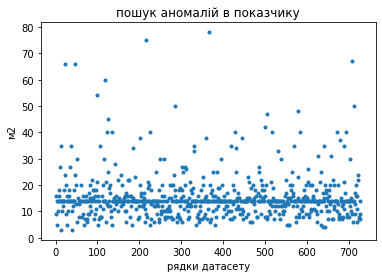

In [40]:
# plt.figure(figsize=(7,7))
plt.plot(aprt['кухня'], '.')
plt.title('пошук аномалій в показчику')
plt.xlabel('рядки датасету')
plt.ylabel('м2')
plt.show()

In [41]:
aprt.head()

,ціна,кімнат,ціна за метр,поверх,всього поверхів,рік збудови,площа,житлова площа,кухня
1,140000.0,2.0,2258.0,7.0,9.0,1969.0,62.0,47.0,9.0
2,105000.0,4.0,847.0,25.0,26.0,2018.0,124.0,71.0,16.0
3,175000.0,3.0,1786.0,25.0,26.0,2010.0,98.0,37.0,14.0
4,30970.0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0
5,82000.0,2.0,1281.0,18.0,26.0,2010.0,64.0,37.0,14.0


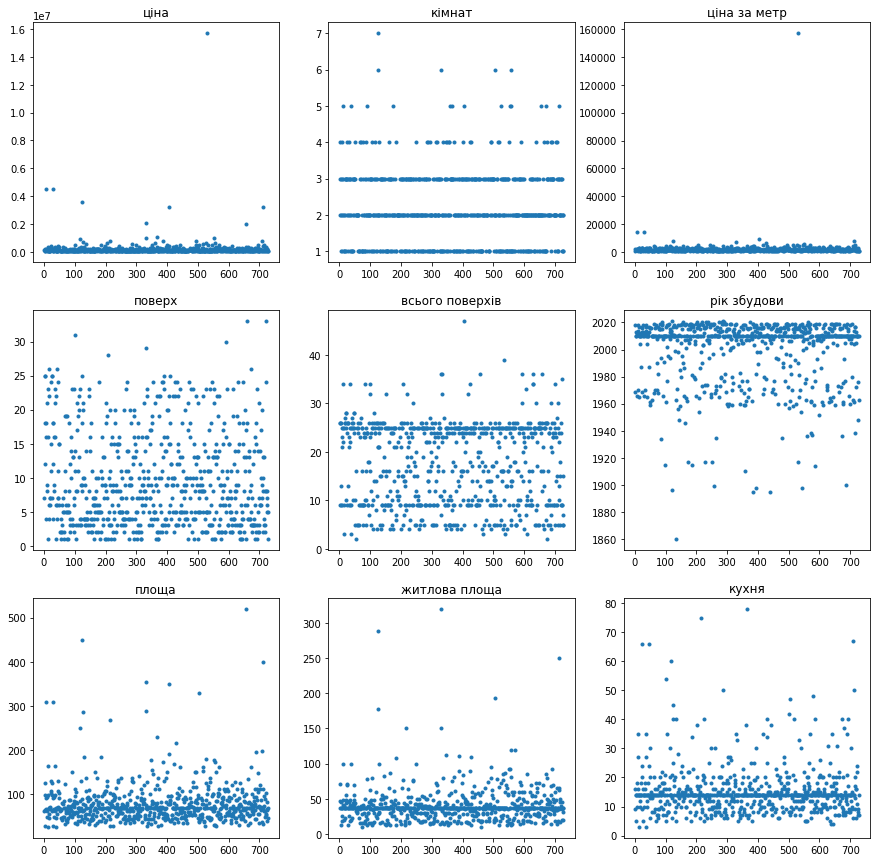

In [44]:
# загальна аналітика аномалій по датасету
fig, axs = plt.subplots(3,3, figsize=(15,15))

for ax, name in list(zip(axs.reshape(9,), aprt.columns)):
    ax.set_title(name)

axs[0,0].plot(aprt['ціна'], '.')
axs[0,1].plot(aprt['кімнат'], '.')
axs[0,2].plot(aprt['ціна за метр'], '.')

axs[1,0].plot(aprt['поверх'], '.')
axs[1,1].plot(aprt['всього поверхів'], '.')
axs[1,2].plot(aprt['рік збудови'], '.')

axs[2,0].plot(aprt['площа'], '.')
axs[2,1].plot(aprt['житлова площа'], '.')
axs[2,2].plot(aprt['кухня'], '.')

plt.show()


In [45]:
aprt[aprt['ціна'] == 15700000.0]

,ціна,кімнат,ціна за метр,поверх,всього поверхів,рік збудови,площа,житлова площа,кухня
530,15700000.0,3.0,157000.0,2.0,4.0,1917.0,100.0,76.0,12.0


In [46]:
aprt[aprt['кухня'] == 78]

,ціна,кімнат,ціна за метр,поверх,всього поверхів,рік збудови,площа,житлова площа,кухня
366,1035900.0,5.0,4504.0,4.0,8.0,2016.0,230.0,75.0,78.0
